In [1]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

startsWithDateAndTime("28/11/2022, 9:46 pm - +91 98999 97263: <Media omitted>")
# startsWithDateAndTime("28/11/2022, 9:39 pm - +91 98999 97263: https://www.hackerearth.com/challenges/hackathon/")

True

In [3]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [4]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [5]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip()
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            print(date, time, author, message)
            messageBuffer.append(message) 
        else:
            
            messageBuffer.append(line)


27/11/2022 8:42 pm None ~ Meeran🤍 created community "Technova SET Tech Society"
27/11/2022 8:42 pm None This group was added to the community "Technova SET Tech Society." Tap to view.
27/11/2022 9:28 pm None +91 88004 37375 added you to this group and the community "Technova SET Tech Society"
27/11/2022 9:32 pm None ~ Meeran🤍 added the groups "TechHub Club 002," "Cyber Pirates official 1" & "Cyber Pirates official  2"
27/11/2022 9:33 pm None ~ Meeran🤍 added the group "Cyber Pirates Official 3"
28/11/2022 9:39 pm None +91 98999 97263: https://www.hackerearth.com/challenges/hackathon/
28/11/2022 9:40 pm None +91 98999 97263: https://tips.hackathon.com/article/what-is-a-hackathon
28/11/2022 9:42 pm None +91 98999 97263: https://www.dsci.in/content/hackathon-2022
28/11/2022 9:43 pm +91 98999 97263 <Media omitted>
28/11/2022 9:46 pm +91 98999 97263 <Media omitted>
28/11/2022 9:46 pm +91 98999 97263 <Media omitted>
28/11/2022 9:47 pm +91 98999 97263 <Media omitted>
28/11/2022 9:47 pm +91 989

In [6]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.shape


C:\Users\karan\AppData\Local\Temp\ipykernel_11820\1905422396.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


(1020, 4)

In [7]:
df.Author.unique()

array([None, '+91 98999 97263', '+91 96967 50061', '+91 96319 16505',
       '+91 98182 21080', '+91 80105 73162', '+91 70429 36789',
       '+91 88004 37375', '+91 91367 80090', '+91 88736 41005',
       '+91 74819 32808', '+91 81269 03635', '+91 98104 46717',
       '+91 6387 691 008', '+91 85878 83727', '+91 97990 81629',
       '~ Dr. Vishal Jain added the groups "SU Students_Hackathon-2!," "SU Students',
       '+91 99115 60835', '+91 99911 10899', '+91 97187 45511',
       '+91 95556 69855', '+91 85297 31173', '+91 91491 11565',
       '+91 75051 71543', '+91 74548 17315', '+91 75059 50750',
       '~ Meeran🤍 changed the community\'s name from "Technova SET Tech Society" to "Technova'],
      dtype=object)

In [9]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)
def split_count(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Data science Community")
# print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

395
0
Data science Community
Media: 395
Emojis: 0
Links: 326


In [10]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['+91 98999 97263', '+91 96967 50061', '+91 96319 16505']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      625 non-null    datetime64[ns]
 1   Time      625 non-null    object        
 2   Author    428 non-null    object        
 3   Message   625 non-null    object        
 4   emoji     625 non-null    object        
 5   urlcount  625 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.2+ KB
Stats of +91 98999 97263 -
Messages Sent 73
Words per message 32.10958904109589
Media Messages Sent 120
Emojis Sent 0
Links Sent 25

Stats of +91 96967 50061 -
Messages Sent 134
Words per message 42.05223880597015
Media Messages Sent 103
Emojis Sent 0
Links Sent 86

Stats of +91 96319 16505 -
Messages Sent 2
Words per message 3.0
Media Messages Sent 4
Emojis Sent 0
Links Sent 0



In [11]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 126931 words in all the messages.


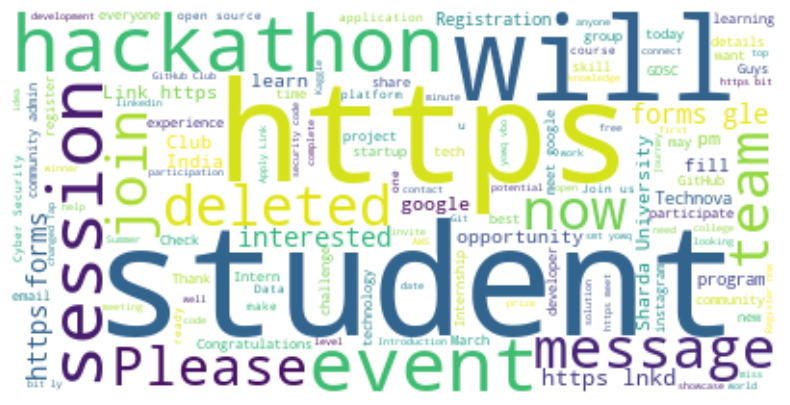

In [12]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()